In [51]:
import pickle
import numpy as np

In [31]:
i = 2
filename = '/home/hadi/Desktop/stewart_platform_learning/models/pilco_mgpr/' + f'gp_mpdel_{i+1}.pickle'
with open(filename, 'rb') as file:
    param_temp = pickle.load(file)

In [32]:
param_temp

{'.kernel.variance': <Parameter: dtype=float64, shape=[], fn="softplus", numpy=nan>,
 '.kernel.lengthscales': <Parameter: dtype=float64, shape=[12], fn="softplus", numpy=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])>,
 '.likelihood.variance': <Parameter: dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=nan>}

In [39]:
gpflow_base_param = param_temp['.kernel.variance']

In [63]:
gpflow_base_param = np.array(0)

In [65]:
type(gpflow_base_param)

numpy.ndarray

In [62]:
param_temp

{'.kernel.variance': <Parameter: dtype=float64, shape=[], fn="softplus", numpy=nan>,
 '.kernel.lengthscales': <Parameter: dtype=float64, shape=[12], fn="softplus", numpy=array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])>,
 '.likelihood.variance': <Parameter: dtype=float64, shape=[], fn="chain_of_shift_of_softplus", numpy=nan>}

## Learn GPFLOW

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import gpflow

2023-04-08 14:17:59.279030: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-08 14:18:00.183922: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/hadi/Desktop/stewart_platform_learning/devel/lib:/opt/ros/noetic/lib:/opt/ros/noetic/lib/x86_64-linux-gnu:/usr/local/cuda-11.4/lib64:/home/hadi/.mujoco/mujoco210/bin:/usr/lib/nvidia
2023-04-08 14:18:00.184025: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared

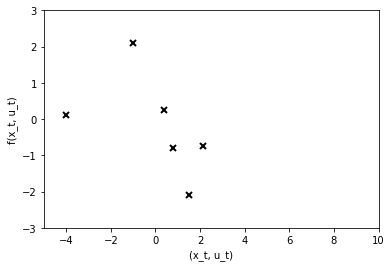

In [98]:
X = np.array(
    [
        [-4], [-1], [0.8], [1.5], [2.147], [0.4]
    ]
)
Y = np.array(
    [
        [0.12], [2.1], [-0.8], [-2.1], [-0.75], [0.25]
    ]
)

plt.plot(X, Y, "kx", mew=2)
plt.ylim(-3,3)
plt.xlim(-5,10)
plt.xlabel("(x_t, u_t)")
plt.ylabel("f(x_t, u_t)")
plt.savefig("small_dataset.png",dpi=300)

## first try nonlinear models 

In [85]:
from sklearn.neural_network import MLPRegressor

In [86]:
model = MLPRegressor(hidden_layer_sizes=(3,),activation='tanh', solver='lbfgs')
model_2 = MLPRegressor(hidden_layer_sizes=(8,), activation='relu', solver='lbfgs')
model_3 = MLPRegressor(hidden_layer_sizes=(10,), activation='logistic',solver='lbfgs')


In [87]:
model.fit(X,Y.reshape(6,))
model_2.fit(X,Y.reshape(6,))
model_3.fit(X,Y.reshape(6,))

/home/hadi/.local/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(activation='logistic', hidden_layer_sizes=(10,), solver='lbfgs')

In [88]:
x_test = np.arange(-5,10,0.1)


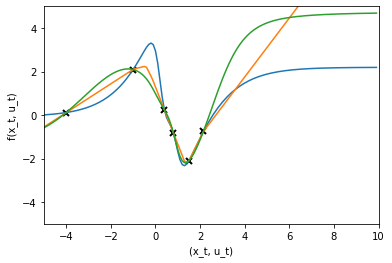

In [89]:
plt.plot(X, Y, "kx", mew=2)
plt.ylim(-5,5)
plt.xlim(-5,10)
plt.xlabel("(x_t, u_t)")
plt.ylabel("f(x_t, u_t)")
plt.plot(x_test, model.predict(x_test.reshape(150,1)))
plt.plot(x_test, model_2.predict(x_test.reshape(150,1)))
plt.plot(x_test, model_3.predict(x_test.reshape(150,1)))
plt.savefig("deter_non_lin_model.png",dpi=300)

In [25]:
model = MLPRegressor( activation='tanh', solver='lbfgs')

MLPRegressor(activation='tanh', solver='lbfgs')

In [28]:
model.predict(X)

array([ 0.11996239,  2.09981331, -0.80133559, -2.09841994, -0.75114318,
        0.25096895])

# Create model

In [90]:
model = gpflow.models.GPR(
    (X, Y),
    kernel=gpflow.kernels.SquaredExponential(),
)

2023-04-08 14:50:23.388511: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-08 14:50:23.396343: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-08 14:50:23.396800: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-04-08 14:50:23.399308: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [91]:
model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1
GPR.kernel.lengthscales,Parameter,Softplus,,True,(),float64,1
GPR.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1


In [92]:
opt = gpflow.optimizers.Scipy()
opt.minimize(model.training_loss, model.trainable_variables)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


2023-04-08 14:50:37.358475: I tensorflow/core/util/cuda_solvers.cc:179] Creating GpuSolver handles for stream 0xba2f850


      fun: 8.63997563394862
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.24737091e-04, -1.39779868e-06,  4.56418110e-08])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 34
      nit: 27
     njev: 34
   status: 0
  success: True
        x: array([  0.07842091,   1.63401902, -17.95715036])

Now we can use the model to predict values of  f and Y at new values of X.

In [78]:
Xnew = np.array([[0.5]])
model.predict_f(Xnew)

(<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[4.28009566]])>,
 <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.30584767]])>)

In [77]:

model.predict_y(Xnew)


(<tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[4.28009566]])>,
 <tf.Tensor: shape=(1, 1), dtype=float64, numpy=array([[0.54585965]])>)

## Ploting the model

In [93]:

Xplot = np.linspace(-5, 10, 100)[:, None]

In [94]:
f_mean, f_var = model.predict_f(Xplot, full_cov=False)
y_mean, y_var = model.predict_y(Xplot)

We compute the 95% confidence interval of  f and Y. This math is based on the distribution of  f and Y being gaussian:

In [95]:
f_lower = f_mean - 1.96 * np.sqrt(f_var)
f_upper = f_mean + 1.96 * np.sqrt(f_var)
y_lower = y_mean - 1.96 * np.sqrt(y_var)
y_upper = y_mean + 1.96 * np.sqrt(y_var)

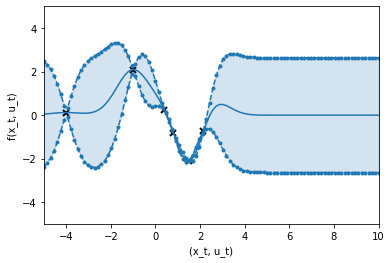

In [99]:
plt.plot(X, Y, "kx", mew=2, label="input data")
plt.plot(Xplot, f_mean, "-", color="C0", label="mean")
plt.plot(Xplot, f_lower, "--", color="C0", label="f 95% confidence")
plt.plot(Xplot, f_upper, "--", color="C0")
plt.fill_between(
    Xplot[:, 0], f_lower[:, 0], f_upper[:, 0], color="C0", alpha=0.1
)
plt.plot(Xplot, y_lower, ".", color="C0", label="Y 95% confidence")
plt.plot(Xplot, y_upper, ".", color="C0")
plt.fill_between(
    Xplot[:, 0], y_lower[:, 0], y_upper[:, 0], color="C0", alpha=0.1
)
plt.ylim(-5,5)
plt.xlim(-5,10)
plt.xlabel("(x_t, u_t)")
plt.ylabel("f(x_t, u_t)")


plt.savefig("gauss_proc.png",dpi=300)
